In [243]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score

import pickle
import re
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
# import matplotlib.pyplot as plt
def final_predict(actual,predict):
    #plt.title(f'{stock} prediction after {date}')
    plt.plot(actual,label='actual')
    plt.plot(predict,label='predict')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend(loc='best')
    plt.show()

In [319]:
with open(os.path.join(os.getcwd(),"data","2330.pickle"),'rb') as f:
    df = pickle.load(f).iloc[:-60]
    df.drop(['year','week','month','day','adj_close'],axis=1,inplace=True)

#with open("0050.pickle",'rb') as f:
    #df = pickle.load(f)
    
    #df.info()
    data_x=[]
    data_y=[]
    print(len(df))
    for i in range(30,len(df)-5):
        batch=df.iloc[i-30:i]
        #data_x.append(list(batch['high'].values[:]))
        #data_x.append(np.array(batch.values[:]).flatten())
        data_x.append(df.iloc[i].values[:])

        #data_y.append(np.mean(df.iloc[i+1:i+5]['high']))
        data_y.append((np.mean(df.iloc[i+1:i+5]['high'])-df.iloc[i]['close'])/df.iloc[i]['close'])

        #data_y.append(df.iloc[i+0]['high'])
    data_x = np.array(data_x)
    data_y = np.array(data_y)  
    

4039


In [318]:
for i in range(len(df.columns)):
    print(i,df.columns[i])
df.columns

0 close
1 high
2 low
3 open
4 volume
5 K
6 D
7 3K-2D
8 MA_5
9 MA_10
10 MA_20
11 MA_30
12 MA_5-10
13 MA_5-20
14 MA_5-30
15 MA_10-20
16 MA_10-30
17 MA_20-30
18 EMA_12
19 EMA_26
20 DIF
21 DEM
22 OSC
23 Dif
24 cal_U
25 cal_D
26 ema_U
27 ema_D
28 RS
29 RSI
30 OBV


Index(['close', 'high', 'low', 'open', 'volume', 'K', 'D', '3K-2D', 'MA_5',
       'MA_10', 'MA_20', 'MA_30', 'MA_5-10', 'MA_5-20', 'MA_5-30', 'MA_10-20',
       'MA_10-30', 'MA_20-30', 'EMA_12', 'EMA_26', 'DIF', 'DEM', 'OSC', 'Dif',
       'cal_U', 'cal_D', 'ema_U', 'ema_D', 'RS', 'RSI', 'OBV'],
      dtype='object')

In [ ]:
20 DIF
1  high
5  K
0  close
16 MA_10-30
26 ema_U
13 MA_5-20
24 cal_U
23 Dif
21 DEM

0.054160989848464514


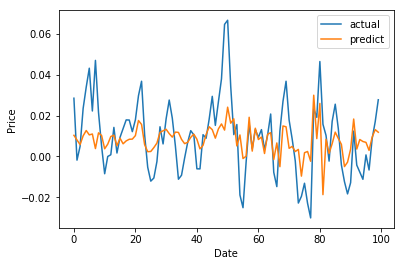

Select by accuracy of cross validation (10 fold)
Remain features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30]
Remain features: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25
 26 27 28 29 30]
Remain features: [ 0  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26
 27 28 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27
 28 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 13 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 13 14 15 17 19 21 22 23 24 25 26 27 28 29
 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 13 14 15 17 19 21 22 23 24 25 27 28 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 14 15 17 19 21 22 23 24 25 27 28 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 14 15 17 19 21 22 23 25 27 28 29 30]
Remain features: [ 2  3  4  6  7  8  9 10 11 12 14 15 17 19 21 22 25 27 

In [320]:


data_X,data_Y=shuffle(data_x,data_y, random_state=1)

train_x, test_x,train_y,test_y = train_test_split(data_X, data_Y, test_size=0.33, random_state=2)
clf = Pipeline([
    #('scl', StandardScaler()),
    ('scl', MinMaxScaler()),
    ('pca', PCA(n_components=15)),
    ('clf',XGBRegressor())
    #('clf',GradientBoostingRegressor())
    #('clf', RandomForestRegressor(n_estimators=500))
])
clf.fit(train_x, train_y)
#print(clf.predict([[102.3,103.25,103.45,104.05,104.35,105,106.35]]))
print(clf.score(test_x, test_y))
final_predict(data_y[-200:-100],clf.predict(data_x[-200:-100]))

print('Select by accuracy of cross validation (10 fold)')
n_features = len(df.columns)
index = np.arange(n_features)
copy = train_x
for i in reversed(range(20,31)):
    train_x = copy
    index = np.arange(n_features)
    for n_remove_fea in range(0, n_features - i):
        # internal loop to compare the performance of each feature
        acc = []
        for i in range(0, n_features - n_remove_fea):
            tr_ = np.delete(train_x,i,1)
            #test_X  = np.delete(test_x, i,1)
            clf.fit(tr_,train_y)
            acc.append(np.mean(cross_val_score(clf, tr_, train_y, cv=10, scoring="r2")))
        index = np.delete(index,np.argmax(acc))
        train_x = np.delete(train_x,np.argmax(acc),1)
    print('Remain features:', index)



In [288]:
with open(os.path.join(os.getcwd(),"data","2330.pickle"),'rb') as f:
    df = pickle.load(f).iloc[-60:]
    df.drop(['year','week','month','day','adj_close'],axis=1,inplace=True)

#with open("0050.pickle",'rb') as f:
    #df = pickle.load(f)
    
    df.info()
    data_x=[]
    data_y=[]
    print(len(df))
    for i in range(30,len(df)-5):
        batch=df.iloc[i-30:i]
        #data_x.append(list(batch['high'].values[:]))
        #data_x.append(np.array(batch.values[:]).flatten())
        data_x.append(df.iloc[i].values[:])

        #data_y.append(np.mean(df.iloc[i+1:i+5]['high']))
        data_y.append((np.mean(df.iloc[i+1:i+5]['high'])-df.iloc[i]['close'])/df.iloc[i]['close'])

        #data_y.append(df.iloc[i+0]['high'])
    data_x = np.array(data_x)
    data_y = np.array(data_y)  
        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 4037 to 4096
Data columns (total 31 columns):
close       60 non-null float64
high        60 non-null float64
low         60 non-null float64
open        60 non-null float64
volume      60 non-null int64
K           60 non-null float64
D           60 non-null float64
3K-2D       60 non-null float64
MA_5        60 non-null float64
MA_10       60 non-null float64
MA_20       60 non-null float64
MA_30       60 non-null float64
MA_5-10     60 non-null float64
MA_5-20     60 non-null float64
MA_5-30     60 non-null float64
MA_10-20    60 non-null float64
MA_10-30    60 non-null float64
MA_20-30    60 non-null float64
EMA_12      60 non-null float64
EMA_26      60 non-null float64
DIF         60 non-null float64
DEM         60 non-null float64
OSC         60 non-null float64
Dif         60 non-null float64
cal_U       60 non-null float64
cal_D       60 non-null float64
ema_U       60 non-null float64
ema_D       60 non-null float6

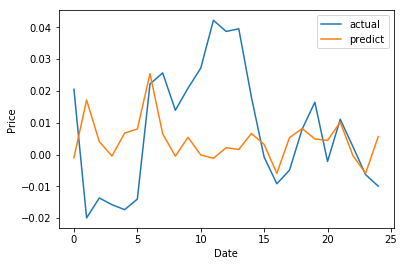

In [289]:

final_predict(data_y[:],clf.predict(data_x[:]))


In [290]:
print(clf.score(data_x[:], data_y[:]))

-0.19650973688126205
